In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import relu,linear,softmax
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [2]:
schema_data = pd.read_csv('../../Datasets/Tamil Char Recognition/schema.csv',dtype=object)

In [3]:
schema_data

,letter,folder,class
0,அ,001,0
1,ஆ,002,1
2,இ,003,2
3,ஈ,004,3
4,உ,005,4
5,ஊ,006,5
6,எ,007,6
7,ஏ,008,7
8,ஐ,009,8
9,ஒ,010,9


In [4]:
dataset_base_path = "../../Datasets/Tamil Char Recognition/data"
all_folders = os.listdir(dataset_base_path)

In [5]:
all_folders

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013']

In [8]:
bmp_image = Image.open(dataset_base_path+'/001/1s_001.bmp')
if bmp_image.mode != "L":
    bmp_image = bmp_image.convert("L")
pixel_data = list(bmp_image.getdata())    

In [9]:
pixel_data

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255

In [8]:
train_set = []
test_set = []
validation_set = []

In [9]:
for folder in all_folders:
    pixel_data = []
    for image in os.listdir(dataset_base_path+'/'+folder):
        resized_image = Image.open(dataset_base_path+'/'+folder+'/'+image).resize((28,28))
        resized_image = resized_image.convert("L")
        pixel_values = np.array(resized_image)
        pixel_values = pixel_values.reshape(1,784)
        pixel_values = pixel_values / 255.0
        pixel_values = np.append(pixel_values,np.float64(schema_data[schema_data['folder'] == folder]['class'])).reshape(1,785)
        pixel_data.append(pixel_values)
    result = np.vstack(pixel_data)
    temp_train,temp_=train_test_split(result,test_size=0.40, random_state=1)
    temp_test,temp_valid = train_test_split(temp_,test_size=0.50, random_state=1)   
    train_set.append(temp_train)
    test_set.append(temp_test)
    validation_set.append(temp_valid)

C:\Users\Kesavan Ramalingam\AppData\Local\Temp\ipykernel_22948\3060580998.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pixel_values = np.append(pixel_values,np.float64(schema_data[schema_data['folder'] == folder]['class'])).reshape(1,785)


In [10]:
train_set = np.vstack(train_set)
test_set = np.vstack(test_set)
validation_set = np.vstack(validation_set)

In [11]:
print(train_set.shape)
print(test_set.shape)
print(validation_set.shape)

(4095, 785)
(1365, 785)
(1365, 785)


In [12]:
x_train = train_set[:,:-1]
y_train = train_set[:,-1]
x_test = test_set[:,:-1]
y_test = test_set[:,-1]
x_valid = validation_set[:,:-1]
y_valid = validation_set[:,-1]

In [13]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)
y_valid = y_valid.astype(np.int64)

In [14]:
y_train.shape

(4095,)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(4095, 784)
(4095,)
(1365, 784)
(1365,)
(1365, 784)
(1365,)


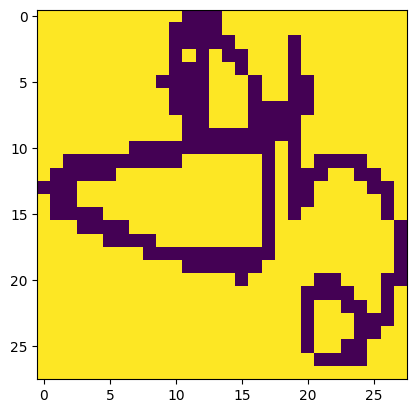

In [16]:
plt.imshow(np.array(x_train[500]).reshape(28,28))

In [21]:
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(120,activation = 'relu'),
    Dense(60,activation = 'relu'),
    Dense(30,activation = 'relu'),
    Dense(13,activation = 'softmax')
])

In [22]:
model.compile(loss ='sparse_categorical_crossentropy',optimizer='adam',metrics ='accuracy')

In [24]:
model.fit(x_train,y_train ,epochs=20)

Epoch 1/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0995 - accuracy: 0.9656
Epoch 2/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0708 - accuracy: 0.9775
Epoch 3/20
128/128 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9802
Epoch 4/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0579 - accuracy: 0.9841
Epoch 5/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0534 - accuracy: 0.9858
Epoch 6/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0810 - accuracy: 0.9712
Epoch 7/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0500 - accuracy: 0.9836
Epoch 8/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0417 - accuracy: 0.9875
Epoch 9/20
128/128 [==============================] - 1s 5ms/step - loss: 0.0316 - accuracy: 0.9917
Epoch 10/20
128/128 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9858

In [25]:
train_prob = tf.nn.softmax(model.predict(x_train)).numpy()
prediction = train_prob.argmax(axis = 1)
print("Train Accuracy :",accuracy_score(y_train,prediction))
print("Train Error :", np.mean(prediction!=y_train))

128/128 [==============================] - 0s 2ms/step
Train Accuracy : 1.0
Train Error : 0.0


In [26]:
cv_prob = tf.nn.softmax(model.predict(x_valid)).numpy()
prediction = cv_prob.argmax(axis = 1)
print("CV Accuracy :",accuracy_score(y_valid,prediction))
print("CV Error :", np.mean(prediction!=y_valid))

43/43 [==============================] - 0s 2ms/step
CV Accuracy : 0.9142857142857143
CV Error : 0.08571428571428572


In [27]:
test_prob = tf.nn.softmax(model.predict(x_test)).numpy()
prediction = test_prob.argmax(axis = 1)
print("Test Accuracy :",accuracy_score(y_test,prediction))
print("Test Error :", np.mean(prediction!=y_test))

43/43 [==============================] - 0s 4ms/step
Test Accuracy : 0.884981684981685
Test Error : 0.11501831501831501
